#Part 1: Introduction

In this notebook, we explore the feature extraction table, cross refer to galaxies in Table 1 (Hart et al. [2016](https://mnras.oxfordjournals.org/content/461/4/3663)), and apply modeling on Spark dataframe. The final goal is to train and compare the accuracy of classification models learnt from our extracted features vs from the morphology measurement Table 1 (Hart et al. [2016](https://mnras.oxfordjournals.org/content/461/4/3663)).

#Part 2: Set up

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/University/Academic/IU/SEM 6/Big Data Analytics for Remote Sensing Laboratory/Final project/Feature extraction/

/content/drive/.shortcut-targets-by-id/1OH30LbPINIykTLjiA4kSRhjamFPdkGIF/IU/SEM 6/Big Data Analytics for Remote Sensing Laboratory/Final project/Feature extraction


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

#Part 3: Data

## 3.1. Table of full samples with inital primary features

In [7]:
path = '/content/drive/MyDrive/University/Academic/IU/SEM 6/Big Data Analytics for Remote Sensing Laboratory/Final project/Feature extraction/'
name1 = 'full_gz2_info.csv'
gz2_1 = pd.read_csv(path+name1)

gz2_1

,FileName,Area,Perimeter,Orientation,Eccentricity,Solidity
0,64601,102,37,0,0.684147,0.809524
1,31973,95,36,0,0.701088,0.922330
2,168202,120,41,0,0.682538,0.930233
3,125778,2,0,0,1.000000,1.000000
4,99807,71,33,0,0.914971,0.922078
...,...,...,...,...,...,...
243429,108550,91,34,0,0.789286,0.928571
243430,230486,122,42,0,0.780836,0.903704
243431,70594,113,43,1,0.448398,0.837037
243432,191748,23,16,0,0.495632,0.821429


## 3.2. Table of 1000 samples with full feature

In [9]:
name2 = 'mini_gz2_info_update.csv'
gz2_2 = pd.read_csv(path+name2)

gz2_2

,FileName,K_Area,K_Perimeter,K_Orientation,K_Eccentricity,K_Solidity,Num_bright,Num_center
0,198489,3,3,0,0.816497,1.000000,1,1
1,115111,5723,323,0,0.881267,0.970987,1,1
2,217599,4187,285,1,0.835188,0.931894,1,1
3,248585,5658,328,0,0.710635,0.941588,1,1
4,63958,4820,292,0,0.791078,0.956349,1,1
...,...,...,...,...,...,...,...,...
995,199752,5443,403,0,0.564761,0.929633,1,1
996,191048,5151,370,0,0.696364,0.906707,1,1
997,81588,5716,344,0,0.761017,0.953302,1,1
998,234435,1,0,0,0.000000,1.000000,1,1


## 3.3. Join 2 feature tables

In [11]:
joined_gz2 = pd.merge(gz2_2, gz2_1, on='FileName', how='inner')

joined_gz2

,FileName,K_Area,K_Perimeter,K_Orientation,K_Eccentricity,K_Solidity,Num_bright,Num_center,Area,Perimeter,Orientation,Eccentricity,Solidity
0,198489,3,3,0,0.816497,1.000000,1,1,100,38,0,0.700626,0.892857
1,115111,5723,323,0,0.881267,0.970987,1,1,175,56,0,0.875187,0.866337
2,217599,4187,285,1,0.835188,0.931894,1,1,83,32,1,0.752794,0.922222
3,248585,5658,328,0,0.710635,0.941588,1,1,94,45,0,0.852074,0.770492
4,63958,4820,292,0,0.791078,0.956349,1,1,145,47,0,0.831553,0.929487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,199752,5443,403,0,0.564761,0.929633,1,1,5,5,0,0.816497,1.000000
996,191048,5151,370,0,0.696364,0.906707,1,1,51,25,0,0.682508,0.894737
997,81588,5716,344,0,0.761017,0.953302,1,1,3,3,0,0.816497,1.000000
998,234435,1,0,0,0.000000,1.000000,1,1,9,8,0,0.890871,0.900000


# Part 4. EDA

## 4.1. Data type

In [12]:
joined_gz2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FileName        1000 non-null   int64  
 1   K_Area          1000 non-null   int64  
 2   K_Perimeter     1000 non-null   int64  
 3   K_Orientation   1000 non-null   int64  
 4   K_Eccentricity  1000 non-null   float64
 5   K_Solidity      1000 non-null   float64
 6   Num_bright      1000 non-null   int64  
 7   Num_center      1000 non-null   int64  
 8   Area            1000 non-null   int64  
 9   Perimeter       1000 non-null   int64  
 10  Orientation     1000 non-null   int64  
 11  Eccentricity    1000 non-null   float64
 12  Solidity        1000 non-null   float64
dtypes: float64(4), int64(9)
memory usage: 101.7 KB


In [13]:
# Convert FileName to object
convert_dict = {'FileName': object}
joined_gz2 = joined_gz2.astype(convert_dict)

joined_gz2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FileName        1000 non-null   object 
 1   K_Area          1000 non-null   int64  
 2   K_Perimeter     1000 non-null   int64  
 3   K_Orientation   1000 non-null   int64  
 4   K_Eccentricity  1000 non-null   float64
 5   K_Solidity      1000 non-null   float64
 6   Num_bright      1000 non-null   int64  
 7   Num_center      1000 non-null   int64  
 8   Area            1000 non-null   int64  
 9   Perimeter       1000 non-null   int64  
 10  Orientation     1000 non-null   int64  
 11  Eccentricity    1000 non-null   float64
 12  Solidity        1000 non-null   float64
dtypes: float64(4), int64(8), object(1)
memory usage: 101.7+ KB


In [16]:
# Get categorical columns and numerical columns
categorical_cols = [feature for feature in joined_gz2.columns if joined_gz2[feature].dtype == "O"]
numerical_cols = [feature for feature in joined_gz2.columns if joined_gz2[feature].dtype != "O"]

print(f'Categorical columns :{categorical_cols}\n')
print(f'Numerical columns :{numerical_cols}')

Categorical columns :['FileName']

Numerical columns :['K_Area', 'K_Perimeter', 'K_Orientation', 'K_Eccentricity', 'K_Solidity', 'Num_bright', 'Num_center', 'Area', 'Perimeter', 'Orientation', 'Eccentricity', 'Solidity']


## 4.2. Descriptive statistics

In [15]:
# Descriptive statistics
joined_gz2.describe()

,K_Area,K_Perimeter,K_Orientation,K_Eccentricity,K_Solidity,Num_bright,Num_center,Area,Perimeter,Orientation,Eccentricity,Solidity
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3923.682000,282.451000,0.023000,0.745423,0.923553,0.965000,0.993000,87.666000,33.895000,0.009000,0.718018,0.896072
std,1991.439118,131.102912,0.625189,0.222798,0.047400,0.194455,0.083414,65.886732,17.767376,0.499167,0.265438,0.075580
min,1.000000,0.000000,-1.000000,0.000000,0.676861,0.000000,0.000000,1.000000,0.000000,-1.000000,0.000000,0.525714
25%,3317.000000,270.750000,0.000000,0.668703,0.900487,1.000000,1.000000,47.000000,27.000000,0.000000,0.625205,0.868297
50%,4399.500000,324.000000,0.000000,0.796512,0.927761,1.000000,1.000000,81.000000,36.000000,0.000000,0.810781,0.908367
75%,5357.750000,359.000000,0.000000,0.895960,0.951584,1.000000,1.000000,119.000000,44.000000,0.000000,0.909827,0.939051
max,7586.000000,542.000000,1.000000,1.000000,1.000000,2.000000,1.000000,784.000000,108.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'K_Area'}>,
        <Axes: title={'center': 'K_Perimeter'}>,
        <Axes: title={'center': 'K_Orientation'}>],
       [<Axes: title={'center': 'K_Eccentricity'}>,
        <Axes: title={'center': 'K_Solidity'}>,
        <Axes: title={'center': 'Num_bright'}>],
       [<Axes: title={'center': 'Num_center'}>,
        <Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Perimeter'}>],
       [<Axes: title={'center': 'Orientation'}>,
        <Axes: title={'center': 'Eccentricity'}>,
        <Axes: title={'center': 'Solidity'}>]], dtype=object)

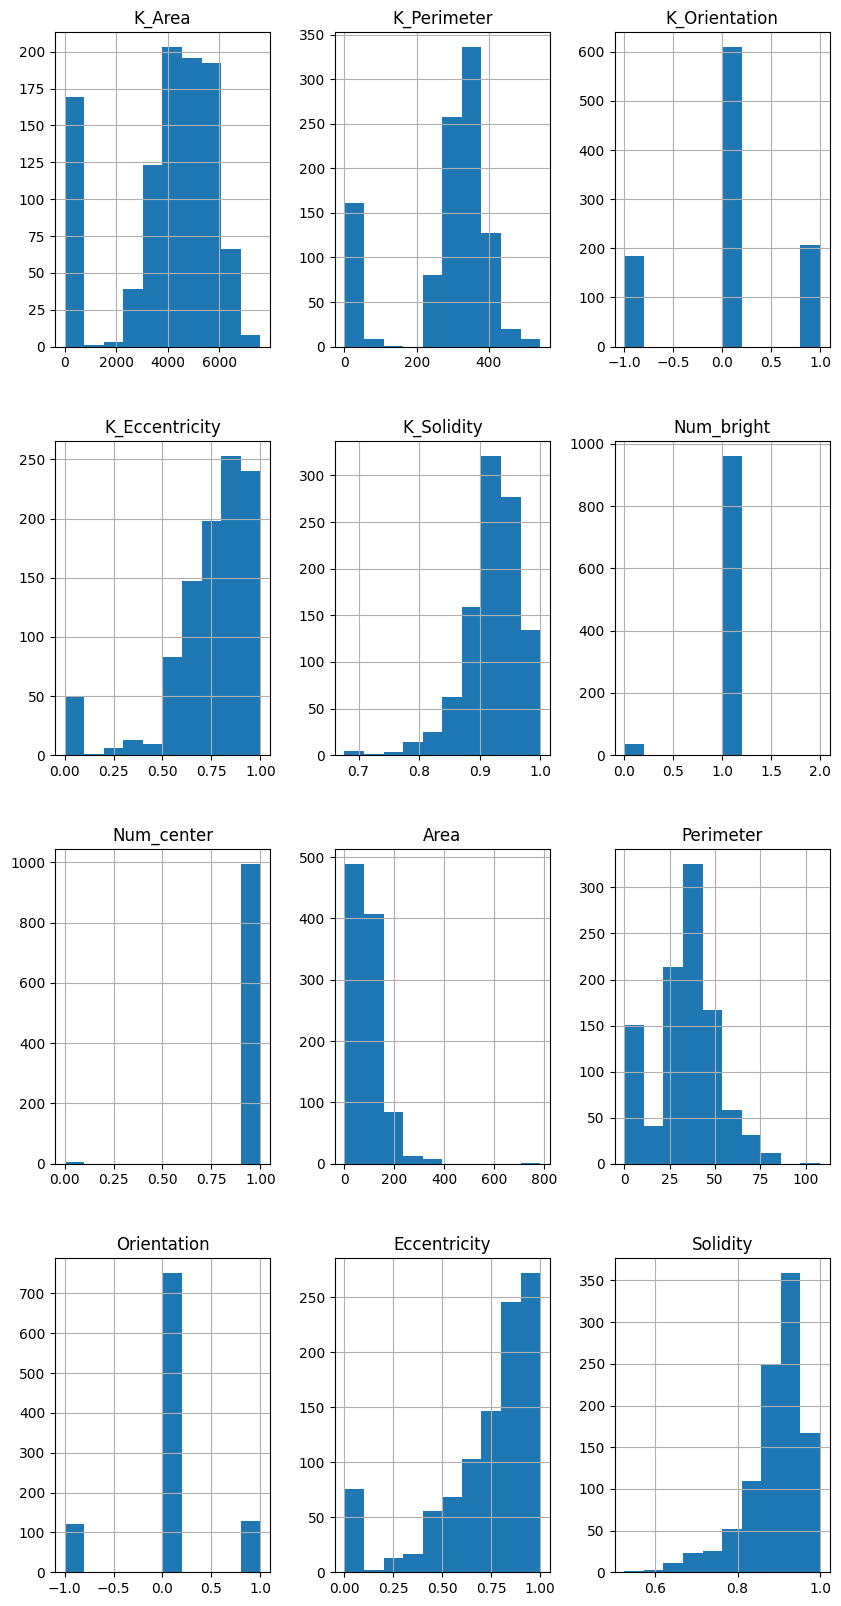

In [18]:
joined_gz2.hist(figsize = (10,20))

###References:

https://academic.oup.com/mnras/article/435/4/2835/1022913

https://mnras.oxfordjournals.org/content/461/4/3663

https://www.kaggle.com/datasets/jaimetrickz/galaxy-zoo-2-images

https://www.kaggle.com/code/brsdincer/galaxies-segmentation-autoencoder-process/notebook